# perparing the data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sbe
import os
import math
import shutil
from glob import glob
from numpy import array
from imutils import paths
from tensorflow.keras import models,layers
import cv2

In [2]:
training_ds=tf.data.Dataset.list_files("Teeth DataSet\\Teeth_Dataset\\Training\\*\\*",shuffle=False)
testing_ds=tf.data.Dataset.list_files("Teeth DataSet\\Teeth_Dataset\\Testing\\*\\*",shuffle=False)
validation_ds=tf.data.Dataset.list_files("Teeth DataSet\\Teeth_Dataset\\Validation\\*\\*",shuffle=False)
for f in training_ds.take(4):
    print(f.numpy())
for f in testing_ds.take(4):
    print(f.numpy())
for f in validation_ds.take(4):
    print(f.numpy())


b'extracted_folder/Teeth DataSet/Teeth_Dataset/Training/CaS/a_100_0_1462.jpg'
b'extracted_folder/Teeth DataSet/Teeth_Dataset/Training/CaS/a_100_0_4424.jpg'
b'extracted_folder/Teeth DataSet/Teeth_Dataset/Training/CaS/a_100_0_5215.jpg'
b'extracted_folder/Teeth DataSet/Teeth_Dataset/Training/CaS/a_100_0_5539.jpg'
b'extracted_folder/Teeth DataSet/Teeth_Dataset/Testing/CaS/a_100.jpg'
b'extracted_folder/Teeth DataSet/Teeth_Dataset/Testing/CaS/a_101_0_1635.jpg'
b'extracted_folder/Teeth DataSet/Teeth_Dataset/Testing/CaS/a_101_0_1711.jpg'
b'extracted_folder/Teeth DataSet/Teeth_Dataset/Testing/CaS/a_101_0_4911.jpg'
b'extracted_folder/Teeth DataSet/Teeth_Dataset/Validation/CaS/a_100_0_982.jpg'
b'extracted_folder/Teeth DataSet/Teeth_Dataset/Validation/CaS/a_101_0_2726.jpg'
b'extracted_folder/Teeth DataSet/Teeth_Dataset/Validation/CaS/a_101_0_5413.jpg'
b'extracted_folder/Teeth DataSet/Teeth_Dataset/Validation/CaS/a_102_0_5905.jpg'


In [3]:
class_name=["CaS","CoS","Gum","MC","OC","OLP","OT"]
training_ds = training_ds.shuffle(200)
testing_ds = testing_ds.shuffle(200)
validation_ds = validation_ds.shuffle(200)
image_train_count=len(training_ds)
print(image_train_count)
print(len(testing_ds))
print(len(validation_ds))


3087
1028
1028


In [5]:
#s="Teeth DataSet\\Teeth_Dataset\\Training\\MC"
#s.split("\\")[-1]
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2]


In [7]:
def process_image(file_path):
    label=get_label(file_path)
    img = tf.io.read_file(file_path)  # Read the image file
    img = tf.image.decode_jpeg(img, channels=3)  # Decode as JPEG
    img = tf.image.resize(img, [224, 224])  # Resize to 256x256
    return img, label  # Return image and label as a tuple


#training_ds = training_ds.map(process_image)

In [9]:
training_ds=training_ds.map(process_image)
testing_ds=testing_ds.map(process_image)
validation_ds=validation_ds.map(process_image)
for img,label in training_ds.take(2):
    print(img)


tf.Tensor(
[[[  3.           5.           0.        ]
  [  3.           5.           0.        ]
  [  3.357143     5.357143     0.35714293]
  ...
  [236.85715    191.85715    149.85715   ]
  [236.85715    191.85715    149.85715   ]
  [236.85715    191.85715    149.85715   ]]

 [[  3.           5.           0.        ]
  [  3.           5.           0.        ]
  [  3.357143     5.357143     0.35714293]
  ...
  [234.57143    189.78572    147.14285   ]
  [234.57143    189.78572    147.14285   ]
  [234.57143    189.78572    147.14285   ]]

 [[  3.           5.           0.        ]
  [  3.           5.           0.        ]
  [  3.357143     5.357143     0.35714293]
  ...
  [233.         189.         143.5408    ]
  [233.         189.         143.84694   ]
  [233.         189.         143.33672   ]]

 ...

 [[202.21437     62.21437     63.21437   ]
  [203.35722     63.35723     64.35723   ]
  [204.50009     64.500084    65.500084  ]
  ...
  [249.77042    244.41328    215.84181   ]
  [253.

In [10]:
def scale(image, label):
    return image/255, label

In [11]:
training_ds=training_ds.map(scale)
testing_ds=testing_ds.map(scale)
validation_ds=validation_ds.map(scale)

In [12]:
# Extracting images (x_train) and labels (y_train) as numpy arrays
x_train = []
y_train = []

for img, label in training_ds.as_numpy_iterator():
    x_train.append(img)
    y_train.append(label)

# Convert lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape, y_train.shape)  # Check the shapes of the data
#print(type(y_train[0]))

(3087, 224, 224, 3) (3087,)


In [13]:
# Extracting images (x_train) and labels (y_train) as numpy arrays
x_test = []
y_test = []

for img, label in testing_ds.as_numpy_iterator():
    x_test.append(img)
    y_test.append(label)

# Convert lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_test.shape, y_test.shape)  # Check the shapes of the data
#print(type(y_train[0]))

(1028, 224, 224, 3) (1028,)


In [14]:
# Extracting images (x_train) and labels (y_train) as numpy arrays
x_val = []
y_val = []

for img, label in validation_ds.as_numpy_iterator():
    x_val.append(img)
    y_val.append(label)

# Convert lists to numpy arrays
x_val = np.array(x_val)
y_val = np.array(y_val)

print(x_val.shape, y_val.shape)  # Check the shapes of the data
#print(type(y_train[0]))

(1028, 224, 224, 3) (1028,)


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder and transform string labels to integer labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
y_val = label_encoder.fit_transform(y_val)
print(y_train)

[0 0 0 ... 6 6 6]


here we prepare the data to be used in the modeling process

# Preparing the model

In [16]:
base_model = tf.keras.applications.MobileNetV2(
    # input_shape=(224, 224, 3),
    # alpha=1.0,
    # include_top=True,  # Include the classification head
    # weights='imagenet',  # Load pre-trained weights
    # input_tensor=None,
    # pooling=None,
    # classes=1000,  # Number of classes in ImageNet
    # classifier_activation='softmax'
    input_shape=(224, 224, 3),
                         include_top=False,  # Exclude the fully connected layer
                         weights='imagenet'
)
base_model.trainable = False

In [17]:
with tf.device('/gpu:0'):

  # Create the model
  model = models.Sequential()
  # Add the MobileNet base model
  model.add(base_model)
  # Add new layers on top
  model.add(layers.GlobalAveragePooling2D())  # To reduce dimensionality
  model.add(layers.Dense(1024, activation='relu'))  # Dense layer
  model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting
  model.add(layers.Dense(7, activation='softmax'))  # Change to your number of classes







In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x_train,y_train,  # Your training data
                    epochs=10,  # Number of epochs
                    validation_data=(x_val,y_val))  # Your validation data

Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 29s 163ms/step - accuracy: 0.4636 - loss: 1.6610 - val_accuracy: 0.7675 - val_loss: 0.6763
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.7914 - loss: 0.5927 - val_accuracy: 0.8687 - val_loss: 0.3990
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8694 - loss: 0.3855 - val_accuracy: 0.8872 - val_loss: 0.3383
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9097 - loss: 0.2774 - val_accuracy: 0.9290 - val_loss: 0.2296
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9447 - loss: 0.1712 - val_accuracy: 0.9407 - val_loss: 0.1920
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9684 - loss: 0.1220 - val_accuracy: 0.9183 - val_loss: 0.2384
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9653 - loss: 0.1112 - val_accuracy: 0.9455 - val_loss: 0.1740
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9677 - loss: 0.0996 - val_accuracy: 0.9397 

In [20]:
model_eval=model.evaluate(x_test,y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9769 - loss: 0.0821


In [22]:
predTransfer=model.predict(x_test)
predTransfer[:15]

33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step


array([[9.98912811e-01, 7.23239136e-05, 1.25741455e-04, 1.44019941e-04,
        7.26594881e-04, 1.40604780e-05, 4.46836611e-06],
       [5.67631378e-06, 9.99988437e-01, 1.52827653e-08, 7.34475350e-07,
        9.20410770e-08, 4.42010696e-06, 5.65402502e-07],
       [9.99949098e-01, 2.92408840e-05, 5.54515918e-06, 1.07984022e-06,
        1.66960967e-06, 1.25848537e-05, 6.87870568e-07],
       [7.08119988e-01, 1.88724043e-05, 2.13334663e-03, 2.19442490e-02,
        6.25863150e-02, 2.05143571e-01, 5.37223932e-05],
       [9.97526467e-01, 1.18446315e-03, 1.29855049e-04, 4.05889878e-04,
        8.53730853e-07, 7.47306156e-04, 5.24897723e-06],
       [9.80499446e-01, 4.97086967e-06, 2.23259376e-05, 1.82587914e-02,
        1.61943008e-05, 1.18650962e-03, 1.16518204e-05],
       [7.39430547e-01, 3.76050775e-05, 2.58326143e-01, 1.51803333e-03,
        7.08024309e-05, 2.82675464e-04, 3.34203301e-04],
       [9.94734347e-01, 1.92986860e-07, 6.27618720e-05, 2.84949411e-03,
        1.24113954e-04, 1

In [23]:
prediction_ner_format=[]
for i in range(predTransfer.shape[0]):
    arr=predTransfer[i]
    maxVal=max(arr)
    index=np.where(arr == maxVal)[0][0]
    prediction_ner_format.append(index)
len(prediction_ner_format)

1028

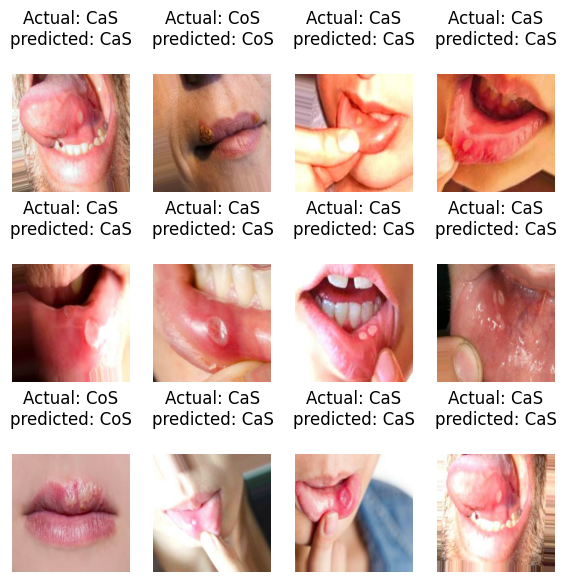

In [24]:
class_name=["CaS","CoS","Gum","MC","OC","OLP","OT"]
plt.figure(figsize=(7, 7))
for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow((x_test[i]*255).astype("uint8"))
        plt.title('Actual: ' +class_name[y_test[i]]+'\n'+'predicted: '+class_name[prediction_ner_format[i]]+'\n')
        plt.axis("off")

In [ ]:
# Save the model using Keras' save method
model.save('teeth_classification_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('saved_model.h5')

# Make predictions
predictions = model.predict(x_test)